# Classification Problem: Predicting the Adoption Speed of Pets

Overview:
The aim is to predict the adoption rate/speed of pet. The dataset contains pet's characteristics and it includes both structured and unstructured data. This notebook is a classic report that contains our approach using both Machine Learning and Deep Learning techiques.The notebook discusses the step-by-step approach for solving this classification problem using the Machine Learning and Deep Learning approach. Stay tuned!!! 

In [1]:
from jyquickhelper import add_notebook_menu 
add_notebook_menu()

# Machine Learning Approach


In this project, we am going to implement the following steps:

1. Data Exploration
2. Data Preprocessing
3. Model Training and Evaluation
4. Build a Sklearn or imblean pipeline that automates all the steps above and uses a predictor.


The Models will be evaluated using the quadratic weighted Kappa score, a metric that meauses the agreement between two ratings.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import emoji
from sklearn import set_config
from scipy import stats
import seaborn as sns
import tensorflow as tf
import cv2
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import StackingClassifier, VotingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model


from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, make_scorer
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, cohen_kappa_score


import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from matplotlib.image import imread

In [3]:
train=pd.read_csv("train.csv") 
train_df= train.copy() #the copy we will use for deep learning approach

In [4]:
test=pd.read_csv("test.csv") 
test_df= test.copy()#the copy we will use for deep learning approach

## Basic Data Exploration

In [5]:
train.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed
0,Dog,84.0,Male,Brown,Cream,Unknown,Small,No,Unknown,Yes,No,Healthy,0.0,He is either lost or abandoned. Please contact...,4.0,3b178aa59-5.jpg,Terrier
1,Dog,1.0,Female,Black,Unknown,Unknown,Medium,Yes,No,Yes,No,Healthy,50.0,"Hi, my name is Rose. I'm very friendly and am ...",3.0,2fbf2cb7c-1.jpg,Mixed_Breed
2,Dog,1.0,Male,Brown,Unknown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,Puppy's age is unknown. My husband went mounta...,1.0,97f683e04-1.jpg,Mixed_Breed
3,Dog,3.0,Male,Black,Unknown,Unknown,Medium,Yes,Unknown,Yes,Unknown,Healthy,0.0,"Hi, I'm Randy, few weeks ago I got beaten by h...",4.0,479500716-2.jpg,Mixed_Breed
4,Dog,8.0,Male,Brown,Unknown,Unknown,Large,Yes,Yes,Yes,No,Healthy,0.0,"Abandoned puppy looking for a home. Hi, he is ...",3.0,4a2270c3e-4.jpg,Mixed_Breed


In [6]:
train.shape

(9000, 17)

In [7]:
train.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',
       'Description', 'AdoptionSpeed', 'Images', 'Breed'],
      dtype='object')

In [8]:
train.dtypes

Type              object
Age              float64
Gender            object
Color1            object
Color2            object
Color3            object
MaturitySize      object
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health            object
Fee              float64
Description       object
AdoptionSpeed    float64
Images            object
Breed             object
dtype: object

### Insights from Data Exploration

Based on the initial exploration of the dataset, we have a good overview of the types of data available for predicting pet adoption speed. The dataset contains 9,000 entries and 17 columns with various features that can be categorized into different types:

Categorical Variables: These include 'Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', and 'Breed'. 


Numerical Variables: 'Age' and 'Fee' are numerical and represent quantitative measurements.We will have to do transformation such as normalization or standardization,

Textual Data: The 'Description' column contains free text descriptions provided by the current caretaker. We will need to  perform significant preprocessing, including natural language processing (NLP) techniques like tokenization, stopwords removal, stemming/lemmatization, and vectorization (e.g., TF-IDF or word embeddings) to transform the text into a format that can be utilized by machine learning models.

Image Data: The 'Images' column references images associated with each pet. While not directly explored here, handling this data will involve image processing techniques, possibly including the use of pre-trained convolutional neural networks (CNNs) to extract features that can be used alongside the tabular data.

Target Variable: 'AdoptionSpeed' is the target variable we aim to predict, categorized into different levels representing the speed at which a pet is adopted. This will be the focus of our model's predictions, and the quadratic kappa score will be used to evaluate the accuracy of these predictions, emphasizing the importance of correctly ordering these categories.



In [9]:
train.drop_duplicates(inplace = True)

In [10]:
train.shape

(9000, 17)

Since running train.drop_duplicates() did not change the shape of the dataset, we can infer that there are no duplicate rows in the dataset, which is excellent for maintaining the quality of the data.

### Exploring Numerical Features

In [11]:
train.describe()

,Age,Fee,AdoptionSpeed
count,9000.000000,9000.000000,9000.000000
mean,11.809778,24.431333,2.473444
std,19.405099,81.575346,1.159645
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000
50%,4.000000,0.000000,2.000000
75%,12.000000,0.000000,4.000000
max,255.000000,2000.000000,4.000000


**Numerical Features Insights**

1. Age: The range is from 0 to 255 months, indicating some outliers (e.g., a pet aged 255 months is over 21 years old, which is quite rare). We might consider capping the age at a certain threshold or handling outliers separately.
2. Fee: Most pets have a zero fee, but it goes up to 2000, indicating some outliers or special cases. This might require normalization or categorization into fee ranges.
3. AdoptionSpeed: This is our target variable, with values ranging from 0 to 4, which is consistent with an ordinal classification problem.

In [12]:
train.isnull().sum()

Type             0
Age              0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Fee              0
Description      0
AdoptionSpeed    0
Images           0
Breed            0
dtype: int64

There are no null values reported across all features, which simplifies preprocessing but strangly, we have some 'Unknown' values in some categorical columns which might effectively be missing information.

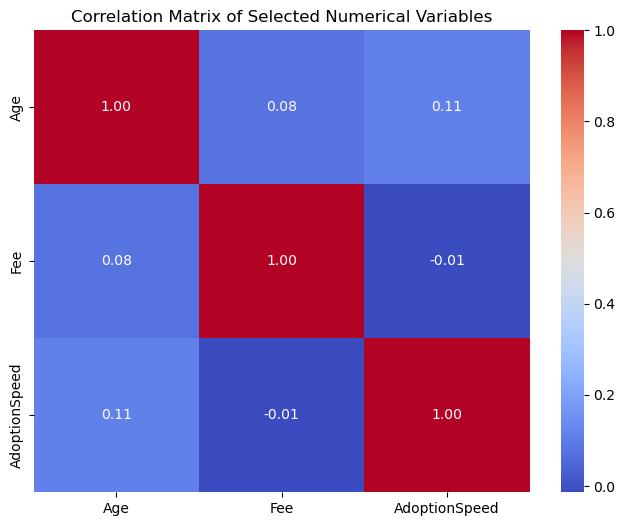

In [13]:
numerical_columns= train.select_dtypes(include=["float64"]).columns
correlation_matrix = train[numerical_columns].corr()

# Visualizing the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Selected Numerical Variables')
plt.show()

**Correlation Matrix Analysis**

1. The correlation matrix shows there is a very slight positive correlation between Age and AdoptionSpeed, suggesting older pets might take slightly longer to be adopted. However, this correlation is weak.
2. There is almost no correlation between Fee and AdoptionSpeed, which implies that the fee might not be a strong predictor of adoption speed.
3. The lack of strong correlations between these numerical features and the target variable suggests that we may need to rely more on the categorical features and potentially derived features from the text and image data to predict AdoptionSpeed accurately.

**Dealing with outliers**

In [14]:
z_scores = np.abs(stats.zscore(train.select_dtypes(include=["float64"])))

#threshold
threshold = 3

# Identify rows with any outliers
outliers = np.any(z_scores > threshold, axis=1)

# Calculate the total number of outliers
total_outliers = np.sum(outliers)
print(total_outliers) 

494


In [15]:
# Identify rows with outliers
outliers = np.where(z_scores > threshold)

# Calculate the number of outliers in each column
num_outliers = np.sum(z_scores > threshold, axis=0)

# Print the number of outliers in each numeric column
print("Number of outliers in each numeric column:")
for col, num in zip(train.select_dtypes(include=[np.number]).columns, num_outliers):
    print(f"{col}: {num}")

Number of outliers in each numeric column:
Age: 261
Fee: 238
AdoptionSpeed: 0


Before deciding on the treatment for these outliers, it's essential to understand their nature. These outliers can result from errors in data entry or they may represent rare but important cases, like a very old pet or a particularly high adoption fee that could be justifiably expected in certain circumstances. This analysis often requires domain knowledge or consultation with experts in the field.

Given the nature of the project, which aims to predict pet adoption speed, it's important to handle outliers in a way that preserves as much information as possible without skewing the model. Outliers in 'Age' may represent actual, older pets which could naturally take longer to be adopted. Similarly, higher 'Fee' values may be less common but still represent a realistic adoption scenario.


With 261 outliers in the age column, this suggests a significant number of pets have ages that are considerably higher or lower than the average pet age. A simple google search reveals that dogs can live up to 30 years and cats around 20 years. Given the biological limits of pet, we may want to retain the outliers.

For te fee column, There are 238 outliers in the fee column, indicating a significant number of pets have adoption fees much higher than the typical range. This could be due to special breeds, rare pets. We should also retain these outliers

### Exploring Categorical Features

In [16]:
#descriptive statistics:
for col in train.select_dtypes(include=['object']).columns:
    mode_value = train[col].mode()[0]
    print(f"Mode for {col}: {mode_value}")

Mode for Type: Dog
Mode for Gender: Female
Mode for Color1: Black
Mode for Color2: Unknown
Mode for Color3: Unknown
Mode for MaturitySize: Medium
Mode for FurLength: Yes
Mode for Vaccinated: Yes
Mode for Dewormed: Yes
Mode for Sterilized: No
Mode for Health: Healthy
Mode for Description: For Adoption
Mode for Images: 0008c5398-4.jpg
Mode for Breed: Mixed_Breed


**Distribution of Categorical Features**

Understanding how many categories each feature has and the distribution of these categories can highlight potential imbalances or areas requiring special attention (e.g., many 'Unknown' values).

In [17]:

# Distribution of categorical features
categorical_columns = ['Type', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize',
                       'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Breed']
for col in categorical_columns:
    print(train[col].value_counts())
    print('\n')

Dog    5380
Cat    3620
Name: Type, dtype: int64


Female    5047
Male      3953
Name: Gender, dtype: int64


Black     4123
Brown     2419
Cream      607
Golden     599
White      445
Gray       431
Yellow     376
Name: Color1, dtype: int64


Unknown    3078
White      2249
Brown      1791
Cream       603
Gray        491
Yellow      423
Golden      365
Name: Color2, dtype: int64


Unknown    7055
White      1451
Cream       186
Gray        146
Yellow       88
Golden       74
Name: Color3, dtype: int64


Medium         6287
Small          1880
Large           808
Extra Large      25
Name: MaturitySize, dtype: int64


Yes        5397
No         3025
Unknown     578
Name: FurLength, dtype: int64


Yes        4113
No         3762
Unknown    1125
Name: Vaccinated, dtype: int64


Yes        5710
No         2242
Unknown    1048
Name: Dewormed, dtype: int64


No         5835
Yes        2198
Unknown     967
Name: Sterilized, dtype: int64


Healthy           8691
Minor Injury       291
Serious 

**Categorical Features Insights**
1. There's a mix of binary, nominal, and ordinal categorical variables. For instance, 'Type' is binary (Dog, Cat), and 'Gender' is also essentially binary (Female, Male).
2. 'Color1', 'Color2', 'Color3', and 'Breed' have a high cardinality, with many unique values. 'Color2' and 'Color3' have a significant number of 'Unknown' values, which we need to decide how to handle—either by imputing, using as a separate category, or dropping, depending on their impact on adoption speed.
3. The 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', and 'Health' variables are ordinal or binary and may require encoding to reflect their inherent order or dichotomy.

In [18]:
# Checking for 'Unknown', 'None', or other placeholders that indicate missing data
placeholders = ['Unknown', 'None', '', ' ']
for col in train.columns:
    for placeholder in placeholders:
        missing_count = (train[col] == placeholder).sum()
        if missing_count > 0:
            print(f"Column '{col}' has {missing_count} missing values represented by '{placeholder}'")


Column 'Color2' has 3078 missing values represented by 'Unknown'
Column 'Color3' has 7055 missing values represented by 'Unknown'
Column 'FurLength' has 578 missing values represented by 'Unknown'
Column 'Vaccinated' has 1125 missing values represented by 'Unknown'
Column 'Dewormed' has 1048 missing values represented by 'Unknown'
Column 'Sterilized' has 967 missing values represented by 'Unknown'
Column 'Breed' has 2 missing values represented by 'Unknown'


1. Color2' and 'Color3' have a considerable number of 'Unknown' entries. This suggests that many pets only have a primary color recorded, or that secondary and tertiary colors are not applicable.
2. 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized': The 'Unknown' values in these columns may represent missing data that wasn't recorded at the time of the pet's listing.
3. 'Breed': There are a few 'Unknown' values here, which might be due to mixed breeds or unidentified breeds.



In [19]:
train['Breed'].value_counts().head(5)

Mixed_Breed             3776
Domestic_Short_Hair     1866
Domestic_Medium_Hair     657
Tabby                    204
Siamese                  170
Name: Breed, dtype: int64

### Distribution of AdoptionSpeed

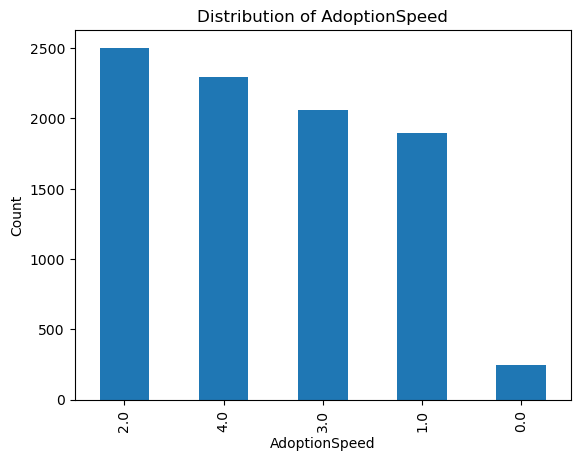

In [20]:
# Distribution of the target variable
train['AdoptionSpeed'].value_counts().plot(kind='bar')
plt.title('Distribution of AdoptionSpeed')
plt.xlabel('AdoptionSpeed')
plt.ylabel('Count')
plt.show()

Key Insights

1. The distribution of AdoptionSpeed shows that category '0' (pets adopted on the same day as listing) is significantly less frequent than the other categories. This indicates that immediate adoptions are rare.

2. Categories '2', '4', and '3' have a relatively more balanced distribution, with '2' being the most common category. This could suggest that most pets are adopted after a short period of being listed.
3. Category '1' (pets that take the longest to be adopted) is less frequent than '2', '3', and '4', but more common than '0'.
4. The imbalance in the distribution suggests that we might need to employ strategies to handle imbalanced classes, such as resampling techniques or using appropriate evaluation metrics like the quadratic kappa score.

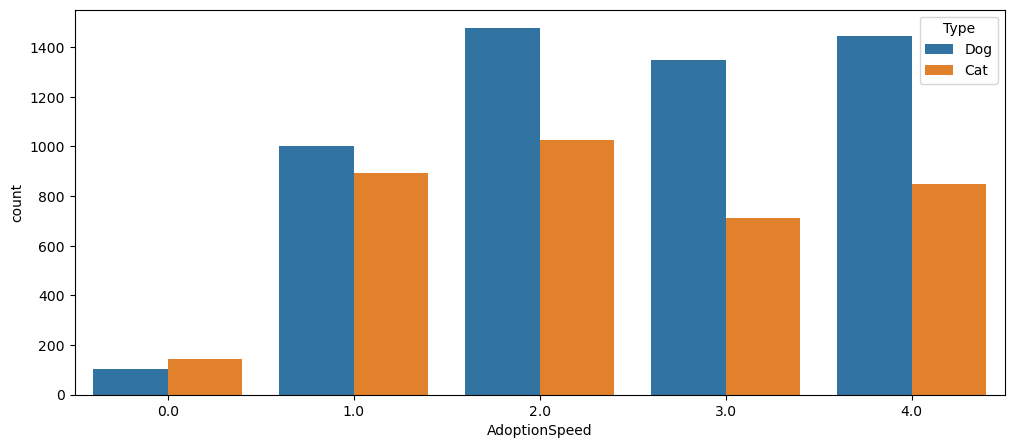

In [21]:

plt.figure(figsize=(12, 5))
sns.countplot(x='AdoptionSpeed', hue='Type', data=train)
plt.show()

## Feature Engineering

The basic exploration of our dataset has given us a good overview of the distribution of the columns and the relevant feature engineering that can enhance our predictions. The dataset has a lot of variability and it's important we try to minimize these variabilities by doing feature engineering. For instance, some of the categorical variables have ordinal relationship, we may use Label Encoding to represent them. These may help us prevent the sparse output that will be generated from using OneHotEncoder. 

### Dealing with unknown values

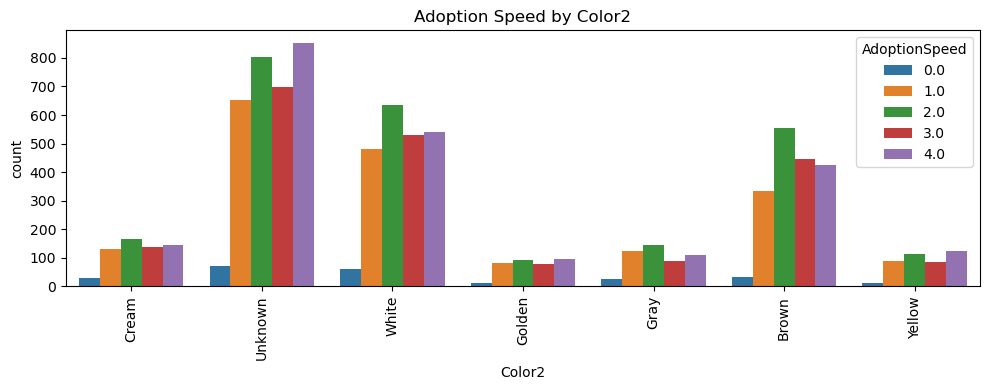

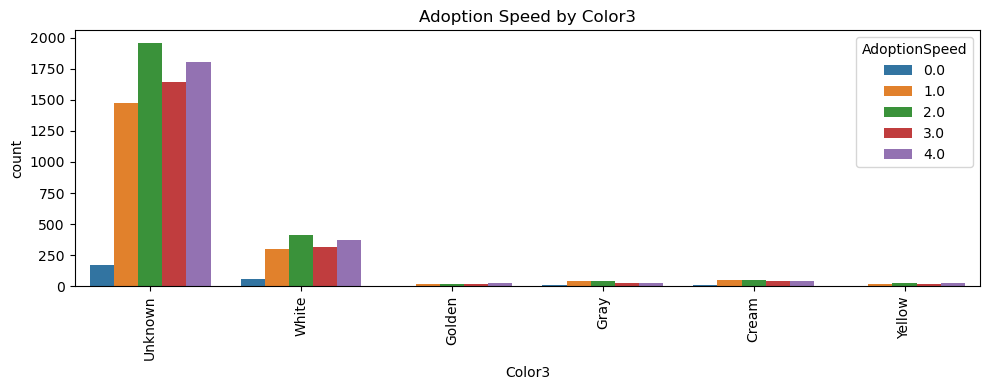

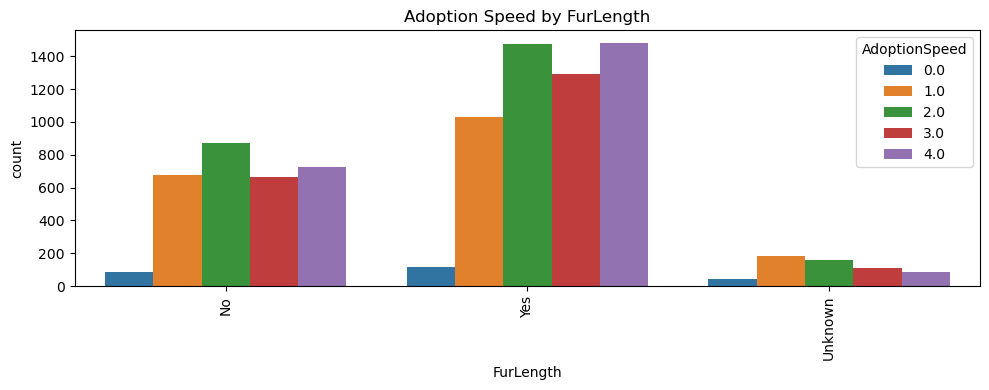

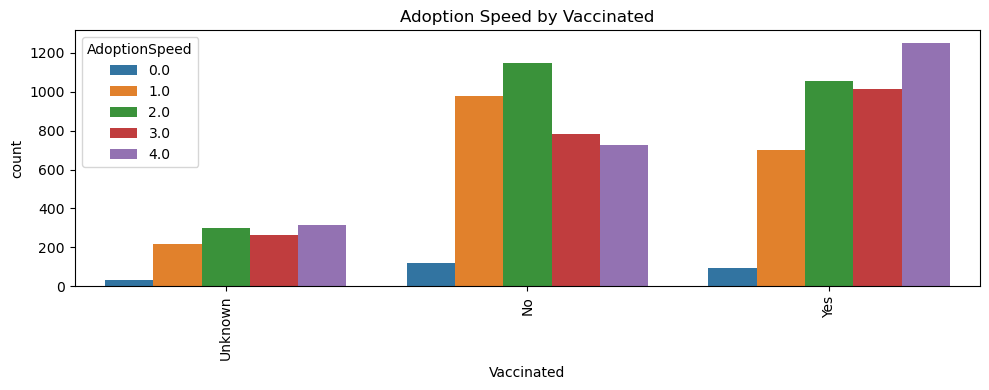

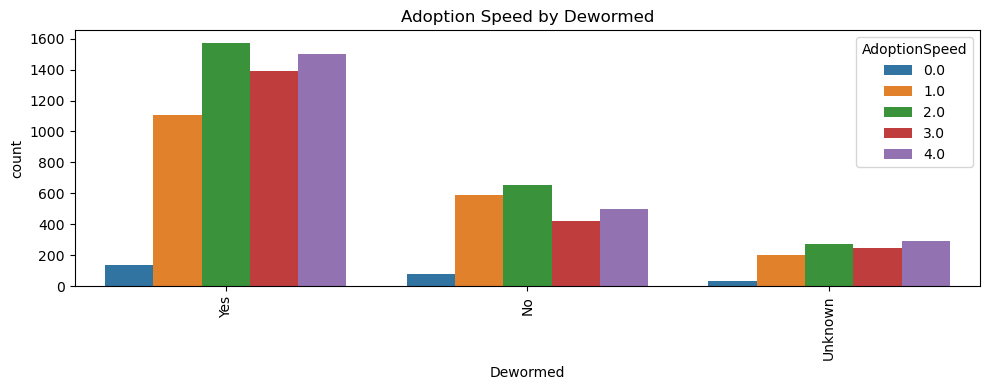

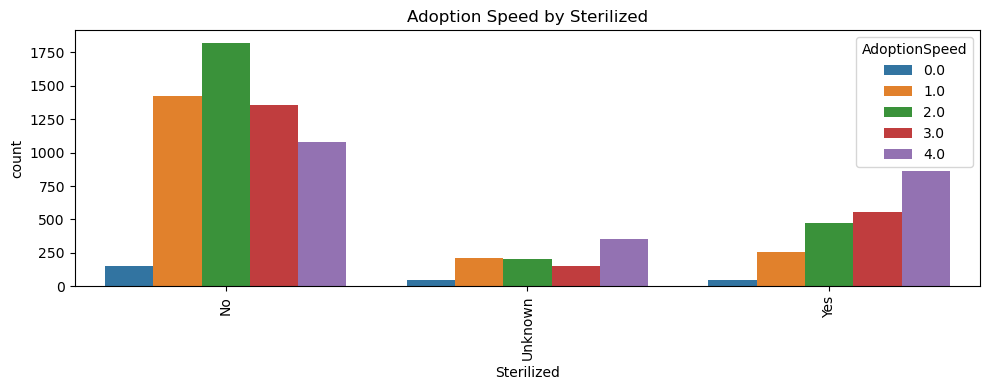

In [22]:
#2. For columns with unknown values, we can check the columns assocaition with the target variables first

# Association with target variable
for col in ['Color2', 'Color3', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized']:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='AdoptionSpeed', data=train)
    plt.title(f"Adoption Speed by {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Key takeaway:
    
1. The 'Unknown' category appears frequently across different adoption speeds, indicating that these might be genuinely unrecorded data. Since color might be less critical to adoption speed compared to medical attributes, we can just drop these columns. Beside, since we already have color1, removing these columns will simplify the model and avoids introducing unnecessary noise into the predictions.

2. other columns such as 'FurLength' 'Vaccinated', 'Dewormed', 'Sterilized' may generally have an impact on adoption preference. These medical attributes likely have a stronger influence on adoption speed. The distribution of 'Unknown' across different adoption speeds seems fairly consistent, which might imply that these could be missing at random. Rather than dropping them, it might be worth treating 'Unknown' as a separate category rather than imputing it, to avoid introducing bias.


### Side Notes: Quick Statistical Analysis

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

#This code was copied online and adapted to our task accordingly

# Initialize an empty list to store each row (as a dict)
rows_list = []
#Assuming 'train' is your DataFrame and 'AdoptionSpeed' is your target variable
cat = ['Breed', 'Color2', 'Color3', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized']

#Initialize a DataFrame to store p-values
chi2_results = pd.DataFrame(columns=['Feature', 'Chi2 Statistic', 'p-value', 'Degrees of Freedom'])

for col in categorical_columns:
    # Create a cross-tabulation table between each categorical variable and the target
    contingency_table = pd.crosstab(train[col], train['AdoptionSpeed'])
    # Perform the Chi-Square test
    chi2_stat, p_val, dof, _ = chi2_contingency(contingency_table)
    # Append the results
    row= {
        'Feature': col,
        'Chi2 Statistic': chi2_stat,
        'p-value': p_val,
        'Degrees of Freedom': dof
    }
    # Add the dict to the list
    rows_list.append(row)

chi2_results = pd.DataFrame(rows_list)
print(chi2_results)

         Feature  Chi2 Statistic        p-value  Degrees of Freedom
0           Type      107.555913   2.416217e-22                   4
1         Gender       58.201787   6.921847e-12                   4
2         Color1       69.039241   3.053854e-06                  24
3         Color2       77.122398   1.736725e-07                  24
4         Color3       27.075256   1.331600e-01                  20
5   MaturitySize      163.111467   1.218997e-28                  12
6      FurLength      151.534814   9.380706e-29                   8
7     Vaccinated      214.209259   6.434934e-42                   8
8       Dewormed       82.889489   1.278882e-14                   8
9     Sterilized      558.104609  2.358886e-115                   8
10        Health       21.263286   6.479961e-03                   8
11         Breed     1172.891943   2.959129e-38                 608


Color2: The Chi-Square statistic is significant (p-value < 0.05), suggesting a statistically significant association between Color2 and AdoptionSpeed.

Color3: The p-value is above 0.05, indicating no significant association between Color3 and AdoptionSpeed at the conventional significance levels.

FurLength: Shows a very strong association with AdoptionSpeed (p-value < 0.05), indicating that FurLength could be an important feature in predicting adoption speed.

Vaccinated: Also shows a significant association with AdoptionSpeed (p-value < 0.05), suggesting its relevance in predictions.

Dewormed: The association with AdoptionSpeed is significant (p-value < 0.05), indicating it's potentially an important predictor.

Sterilized: Exhibits a very strong association with AdoptionSpeed (p-value < 0.05), suggesting it's a highly relevant feature for your model.

### creating new columns/variables

From the basic data exploration above, we got tangible insights of the distribution of our dataset, relevant columns and important features to consider. based on these insights, we can do some feature engineering and create new variables that can enhance our model prediction rate.

In [24]:
#we create new colour columns based on the number of colours known. This is to account for many unknown values in the color categories

#this function calculate the number of colours known for each pet and saved it in a new coloum "COlorsNum"
def num_colors(row):
    # Create a boolean mask of known colors
    known_colors = (row[['Color1', 'Color2', 'Color3']] != 'Unknown')
    num_colors = known_colors.sum()

    return num_colors

train['COlorsNum'] = train.apply(num_colors, axis=1)

Drop 'Color2' and 'Color3' columns since they contain high number of unknown values.
we have already created the number of colours known, so we have justification for dropping these coloumns with many unknowns

In [25]:
def drop_columns(df):
    # Check if 'Color2' and 'Color3' columns exist in the DataFrame
    if 'Color2' in df.columns and 'Color3' in df.columns:
        # Drop 'Color2' and 'Color3' columns
        df = df.drop(['Color2', 'Color3'], axis=1)
        print("Columns 'Color2' and 'Color3' have been dropped.")
        return df
    else:
        print("Columns 'Color2' and 'Color3' do not exist in the DataFrame.")
        return df

train = drop_columns(train)

Columns 'Color2' and 'Color3' have been dropped.


In [26]:
train.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee', 'Description',
       'AdoptionSpeed', 'Images', 'Breed', 'COlorsNum'],
      dtype='object')

For the 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized' columns, where 'Unknown' values may hold some significance, thanks to our statistical analysis, we can keep these as separate categories. 

In [27]:
#this function creates new categories for the unknown values
def UnknownCategory(df):
    
    # List of columns to transform 'Unknown' values
    columns_to_transform = ['FurLength', 'Vaccinated', 'Dewormed', 'Sterilized']
    
    for col in columns_to_transform:
        # Replace 'Unknown' with a specific category for each column
        df[col] = df[col].replace('Unknown', f'Unknown_{col}')
    
    return df

# Usage example
train = UnknownCategory(train)


we can create new age groups for our cat and dog categories..

In [28]:

# Cat and Dog age groups
cat_groups = ['kitten', 'young', 'adult', 'senior']
dog_groups = ['puppy', 'young', 'adult', 'senior']

# Age bins in months for cats and dogs based on the given age groups
cat_bins = [0, 6, 24, 120, np.inf]  # Kitten: 0-6, Young: 7-24, Adult: 25-120, Senior: 121+
dog_bins = [0, 12, 36, 84, np.inf]  # Puppy: 0-12, Young: 13-36, Adult: 37-84, Senior: 85+

def classify_pet_age(row):
    age = row['Age']
    if row['Type'] == 'Cat':
        return pd.cut([age], bins=cat_bins, labels=cat_groups, include_lowest=True)[0]
    elif row['Type'] == 'Dog':
        return pd.cut([age], bins=dog_bins, labels=dog_groups, include_lowest=True)[0]
    else:
        return 'Unknown'

# Apply the function to classify age groups
train['PetCategory'] = train.apply(classify_pet_age, axis=1)


For categories with low cardinality or binary values, label encoding can help us get finer details

In [29]:

def encode_gender_health(df):
    
    # Encode Gender: 1 for Male, 0 for Female
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    
    # Encode Health: 1 for Healthy, 0 for others (Minor Injury, Serious Injury)
    df['Health'] = df['Health'].map({'Healthy': 1, 'Minor Injury': 0, 'Serious Injury': 0})
    
    return df

# Call the function and assign the result
train= encode_gender_health(train)

In [30]:
train["Health"].value_counts()

1    8691
0     309
Name: Health, dtype: int64

In [31]:


def MaturityEncoding(df, column_name='MaturitySize'):
    # Define the manual mapping based on the natural order of sizes
    size_mapping = {'Small': 0, 'Medium': 1, 'Large': 2, 'Extra Large': 3}
    
    # Apply the mapping to the specified column
    df[column_name] = df[column_name].map(size_mapping)
    
    return df

# Apply function to the DataFrame
train = MaturityEncoding(train, 'MaturitySize')


In [32]:
train['MaturitySize'].value_counts()

1    6287
0    1880
2     808
3      25
Name: MaturitySize, dtype: int64

In [33]:
train.columns

Index(['Type', 'Age', 'Gender', 'Color1', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee', 'Description',
       'AdoptionSpeed', 'Images', 'Breed', 'COlorsNum', 'PetCategory'],
      dtype='object')

## Preprocessing Text Data
Getting a sense of the text data's length, diversity, and common words can inform the NLP preprocessing steps.

In [34]:
# Basic exploration of text data
train['Description'].apply(lambda x: len(x.split())).describe()


count    9000.000000
mean       63.562556
std        70.744777
min         1.000000
25%        21.000000
50%        45.000000
75%        81.000000
max      1257.000000
Name: Description, dtype: float64

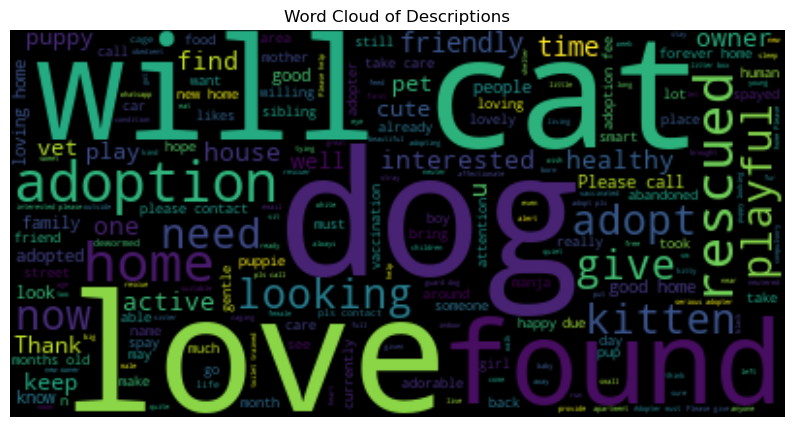

In [35]:
# using cloud word to view the most popular words in the descriptions
# This code is found online

all_Descriptions=""
for i in range(len(train.Description)):
    all_Descriptions = all_Descriptions + train.Description[i]
    all_Descriptions = all_Descriptions + " "
    
wordcloud = WordCloud().generate(all_Descriptions)
fig2 = plt.figure(figsize = (10,10))
ax3 = fig2.add_subplot(111)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.set_title('Word Cloud of Descriptions')
plt.axis("off")
plt.show()

Analyzing textual data involves several steps, which are part of the field of Natural Language Processing (NLP). Steps include:

1. Text cleaning (remvoe punctuation,  special characters, numbers, and stopwords.
2. Tokenization (convert sentences to tokens or words)
3. Normalization ( lowercase)
4. Stemming and Lemmatization ( we will use lemmatization since it's a more sophisticated approach)
5. Vectorization (Convert text to numerical features: we will use TF IDF since it gives more information that counting the frequencies of words)


In [36]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# This function clean and lemmatize our text columns
def clean_and_lemmatize(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    # Remove numbers, special characters, and punctuation
    text = re.sub(r'\d+', '', text) # Removes digits
    text = re.sub(r'\W+', ' ', text) # Removes special characters
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in stop_words]
    return ' '.join(lemmatized_tokens)

In [37]:
train['Description'] = train['Description'].apply(clean_and_lemmatize)

In [38]:
train['Description'][:10]

0    either lost abandoned please contact u know owner
1    hi name rose friendly always happy see rescuer...
2    puppy age unknown husband went mountain biking...
3    hi randy week ago got beaten human caused brok...
4    abandoned puppy looking home hi johnny le year...
5        serious adopter please call msg detail thanks
6                                            calm nice
7    whisky surrendered owner moved apartment frien...
8    rocky found rescued along ldp highway last wee...
9    minnie month old kitten owner since minnie cut...
Name: Description, dtype: object

In [39]:
train.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed,COlorsNum,PetCategory
0,Dog,84.0,1,Brown,0,No,Unknown_Vaccinated,Yes,No,1,0.0,either lost abandoned please contact u know owner,4.0,3b178aa59-5.jpg,Terrier,2,adult
1,Dog,1.0,0,Black,1,Yes,No,Yes,No,1,50.0,hi name rose friendly always happy see rescuer...,3.0,2fbf2cb7c-1.jpg,Mixed_Breed,1,puppy
2,Dog,1.0,1,Brown,1,Yes,No,No,No,1,0.0,puppy age unknown husband went mountain biking...,1.0,97f683e04-1.jpg,Mixed_Breed,1,puppy
3,Dog,3.0,1,Black,1,Yes,Unknown_Vaccinated,Yes,Unknown_Sterilized,1,0.0,hi randy week ago got beaten human caused brok...,4.0,479500716-2.jpg,Mixed_Breed,1,puppy
4,Dog,8.0,1,Brown,2,Yes,Yes,Yes,No,1,0.0,abandoned puppy looking home hi johnny le year...,3.0,4a2270c3e-4.jpg,Mixed_Breed,1,puppy


## Preprocessing Image Dataset

In [40]:
train_image_directory= "/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtract/2023-PetFinder-students files/train_images/"

#This function finds our image path from the subdirectories created after each 
def find_image(image_name, root_directory):
    """
    Search for an image file in a directory and all its subdirectories.
    
    Parameters:
    - image_name: The name of the image file to find.
    - root_directory: The root directory to start the search from.
    
    Returns:
    - The full path to the image file if found, otherwise None.
    """
    for subdir, dirs, files in os.walk(root_directory):
        if image_name in files:
            return os.path.join(subdir, image_name)
    return None

# Update the image paths in the dataframe
train['Images'] = train['Images'].apply(lambda img: find_image(img, train_image_directory))


In [41]:
train["Images"].head()

0    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
1    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
2    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
3    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
4    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
Name: Images, dtype: object

In [42]:
img_path = train['Images'][0]  # This should now contain the correct path
print(img_path)

/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtract/2023-PetFinder-students files/train_images/train_images1\3b178aa59-5.jpg


In [43]:
test_image_directory = "/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtract/2023-PetFinder-students files/test_images/"
test['Images'] = [test_image_directory + img for img in test['Images']]


In [44]:
test["Images"].head()

0    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
1    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
2    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
3    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
4    /Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...
Name: Images, dtype: object

In [45]:
img_path = test['Images'][0]  # This should now contain the correct path
print(img_path)

/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtract/2023-PetFinder-students files/test_images/5df99d229-2.jpg


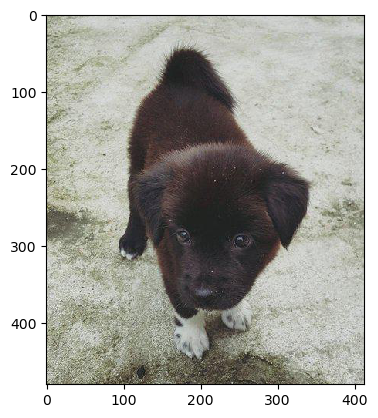

In [46]:
train['Images'][10]
img=imread(train['Images'][5])
plt.imshow(img, cmap="gray", interpolation='nearest', aspect='equal')

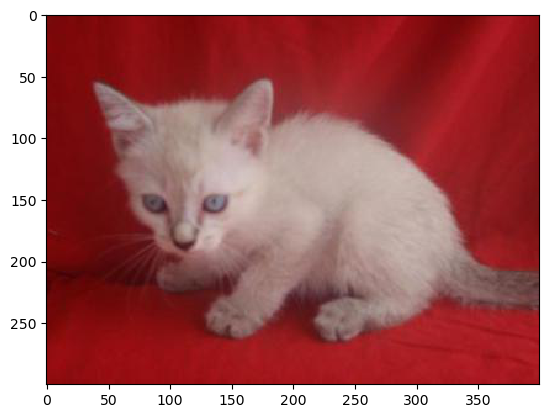

In [47]:
from matplotlib.image import imread
test['Images'][10]
img=imread(test['Images'][5])
plt.imshow(img, cmap="gray", interpolation='nearest', aspect='equal')

In [48]:
train.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed,COlorsNum,PetCategory
0,Dog,84.0,1,Brown,0,No,Unknown_Vaccinated,Yes,No,1,0.0,either lost abandoned please contact u know owner,4.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Terrier,2,adult
1,Dog,1.0,0,Black,1,Yes,No,Yes,No,1,50.0,hi name rose friendly always happy see rescuer...,3.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
2,Dog,1.0,1,Brown,1,Yes,No,No,No,1,0.0,puppy age unknown husband went mountain biking...,1.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
3,Dog,3.0,1,Black,1,Yes,Unknown_Vaccinated,Yes,Unknown_Sterilized,1,0.0,hi randy week ago got beaten human caused brok...,4.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
4,Dog,8.0,1,Brown,2,Yes,Yes,Yes,No,1,0.0,abandoned puppy looking home hi johnny le year...,3.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy


In [49]:
## Function to preprocess Images
def extract_image_features(dataframe, directory, target_size=(224, 224), batch_size=32):
    # Initialize the model with weights pre-trained on ImageNet
    model = ResNet50(weights='imagenet', include_top=False)
    
    # Define image data generator
    datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    
    # Generate image data flow
    image_generator = datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory=directory,
        x_col="Images",
        class_mode=None,
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False
    )
    
    # Extract features
    features = model.predict(image_generator, verbose=1)
    flattened_features = features.reshape(features.shape[0], -1)
    
    # Add features to dataframe and drop image column
    dataframe['image_features'] = list(flattened_features)
    dataframe.drop(columns="Images", inplace=True)
    
    return dataframe

## Building Model and Pipeline

In [50]:
train.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed,COlorsNum,PetCategory
0,Dog,84.0,1,Brown,0,No,Unknown_Vaccinated,Yes,No,1,0.0,either lost abandoned please contact u know owner,4.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Terrier,2,adult
1,Dog,1.0,0,Black,1,Yes,No,Yes,No,1,50.0,hi name rose friendly always happy see rescuer...,3.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
2,Dog,1.0,1,Brown,1,Yes,No,No,No,1,0.0,puppy age unknown husband went mountain biking...,1.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
3,Dog,3.0,1,Black,1,Yes,Unknown_Vaccinated,Yes,Unknown_Sterilized,1,0.0,hi randy week ago got beaten human caused brok...,4.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
4,Dog,8.0,1,Brown,2,Yes,Yes,Yes,No,1,0.0,abandoned puppy looking home hi johnny le year...,3.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy


In [51]:
train.dtypes

Type              object
Age              float64
Gender             int64
Color1            object
MaturitySize       int64
FurLength         object
Vaccinated        object
Dewormed          object
Sterilized        object
Health             int64
Fee              float64
Description       object
AdoptionSpeed    float64
Images            object
Breed             object
COlorsNum          int64
PetCategory       object
dtype: object

In [52]:
numeric_features = ['Age', 'Gender', 'MaturitySize', 'Health', 'Fee', 'COlorsNum']
categorical_features = ['Color1', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Breed', 'PetCategory']

It's generally a good practice to spliit the dataset before doing majority of the preprocessing steps including encoding, standardizing and NLP process. This prevent the problem of data leakage and ensure our data integrity

In [53]:
#seperating target variable and independent variables
y = train['AdoptionSpeed']
X = train.drop(['AdoptionSpeed'], axis=1)

In [54]:
#we split our dataset into train and validation set. The use of stratify parameter here will ensure that the splitting represent our imbalanced dataset as it is.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42)
gb_model= GradientBoostingClassifier(random_state=42)
xgb_model=xgb.XGBClassifier(random_state=42)
lgbm_model=lgb.LGBMClassifier(random_state=42)

we define our preprocessors variables that will make our preprocessing steps seemless

In [56]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
numerical_preprocessor=StandardScaler()
text_preprocessor = TfidfVectorizer(max_features=150)

In [57]:
preprocessor=ColumnTransformer(transformers=[
    ("categorical encoding", categorical_preprocessor, categorical_features),
    ("numerical encoding", numerical_preprocessor, numeric_features),
    ("text encoding", text_preprocessor, "Description")])

Thanks to the image feature extraction function we defined earlier, we can simply extract features from our Image column without disrupting the order of the dataset

In [58]:
X_train_Image= extract_image_features(X_train, train_image_directory)


Found 7200 validated image filenames.


C:\Users\KEMI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step


In [59]:
X_train_Image.shape

(7200, 16)

In [60]:
X_val_image= extract_image_features(X_val, train_image_directory)

Found 1800 validated image filenames.


C:\Users\KEMI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step


In [61]:
X_train= preprocessor.fit_transform(X_train_Image)
X_val=preprocessor.transform(X_val_image)

In [62]:
X_train.shape

(7200, 323)

By passing the Dataframe that contains the image feature extracted into the preprocessor, we have now completed our preprocessing steps. what next? fitting our models

In [63]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
ypred=rf_model.predict(X_val)
Kappa_score = cohen_kappa_score(y_val, ypred, weights='quadratic')
print('Quadratic weighted kappa:', Kappa_score)


Quadratic weighted kappa: 0.3543401405309179


In [65]:
f1_rf = f1_score(y_val, ypred, average='weighted')
print("model F1 score: %.3f" % f1_rf)

model F1 score: 0.405


Our baseline model has a relatively fair kappa score of 0.35. This could be a good start as we continue to use more models to fit our dataset and find the optimal one

In [66]:
lgb_model= lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb= lgb_model.predict(X_val)
kappa_score_lgb= cohen_kappa_score(y_val, y_pred_lgb, weights= "quadratic")
print("Quadratic weighted Kappa:", kappa_score_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 25390
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 212
[LightGBM] [Info] Start training from score -3.593569
[LightGBM] [Info] Start training from score -1.558666
[LightGBM] [Info] Start training from score -1.279435
[LightGBM] [Info] Start training from score -1.473912
[LightGBM] [Info] Start training from score -1.367037
Quadratic weighted Kappa: 0.3700360491076915


In [67]:
# Model evaluation using f1 score
f1_lgb = f1_score(y_val, y_pred_lgb, average='weighted')
print("model F1 score: %.3f" % f1_lgb)

model F1 score: 0.402


Our lightGBM model has similar kappa score to the RandomForest model, although sllghtly better. As it seems, we can continue to fit more models. we can now try using a voting classifier, an ensemble method that combines multiple individual classifiers to make predictions. This can help us aggregate the predictions of each base classifier and selecting the class label that receives the most "votes" from the individual classifiers

We'll be using both the soft and hard voting techniques

In [68]:
# Model ensembling with a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('xgb',xgb.XGBClassifier(random_state=42)),
], voting='soft')

In [69]:
voting_clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ensemble = voting_clf.predict(X_val)
kappa_ensemble = cohen_kappa_score(y_val, y_pred_ensemble, weights='quadratic')
print(f'Ensemble Model Quadratic Kappa Score: {kappa_ensemble}')

Ensemble Model Quadratic Kappa Score: 0.4136955895227119


In [70]:
# Model ensembling with a voting classifier
voting_clf_hard = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('xgb',xgb.XGBClassifier(random_state=42)),
], voting='hard')

In [71]:
voting_clf_hard.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ensemble_hard = voting_clf_hard.predict(X_val)
kappa_ensemble_hard = cohen_kappa_score(y_val, y_pred_ensemble_hard, weights='quadratic')
print(f'Ensemble Model Quadratic Kappa Score: {kappa_ensemble_hard}')

Ensemble Model Quadratic Kappa Score: 0.39449165894564564


As expected, by combining the predictions of multiple classifiers, the voting classifiers has helped us achieve better quadratic kappa score and higher accuracy compared to any single base classifier.

but before we settle for this, we can try more hyperparameters tuning to check if we can get anything  better

## More hyperparameters tuning

In [72]:
import xgboost as xgb
# Define the kappa scorer
kappa_scorer = make_scorer(cohen_kappa_score)

# Step 1: Set up the individual classifiers
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb_classifier = xgb.XGBClassifier(random_state=42)  
lgbm_classifier = lgb.LGBMClassifier(random_state=42, verbose=-1)

# Step 2: Create the VotingClassifier
voting_clf2 = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('lr', lr),
    ('xgb', xgb_classifier),  
    ('lgbm', lgbm_classifier)
], voting='soft')


# Step 3: Build the pipeline
pipeline = Pipeline([
    ('classifier', voting_clf2)
])


# Step 4: Define the parameter grid
param_grid = {
    'classifier__rf__n_estimators': [100, 200],
    'classifier__rf__max_depth': [None, 10, 20],
    'classifier__gb__n_estimators': [100, 200],
    'classifier__gb__learning_rate': [0.01, 0.1],
    'classifier__lr__C': [0.1, 1, 10],
    'classifier__lr__penalty': ['l1','l2'],
    'classifier__lr__solver': ['liblinear'],
    'classifier__lr__max_iter': [200, 300, 400],
    'classifier__xgb__n_estimators': [100, 200],
    'classifier__xgb__learning_rate': [0.01, 0.1],
    'classifier__xgb__max_depth': [3, 5, 7],
    'classifier__xgb__gamma': [0, 0.1, 0.2],
    'classifier__lgbm__n_estimators': [100, 200],
    'classifier__lgbm__learning_rate': [0.01, 0.1],
    'classifier__lgbm__max_depth': [3, 5, 7],
    'classifier__lgbm__min_child_samples': [5, 10, 20],
    'classifier__lgbm__num_leaves': [8,32,128]
}




# Step 5: Configure RandomizedSearchCV
search = RandomizedSearchCV(pipeline, param_grid, n_iter=15,
                            scoring=kappa_scorer, random_state=42, cv=5, verbose=1, n_jobs=1)

# Step 6: Run the hyperparameter tuning
search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('classifier',
                                              VotingClassifier(estimators=[('rf',
                                                                            RandomForestClassifier(random_state=42)),
                                                                           ('gb',
                                                                            GradientBoostingClassifier(random_state=42)),
                                                                           ('lr',
                                                                            LogisticRegression(random_state=42)),
                                                                           ('xgb',
                                                                            XGBClassifier(base_score=None,
                                                                                          booster=None,
                                                                                          callbacks=None,
                                                                                          colsample_bylevel=None,
                                                                                          colsample_bynode=None,
                                                                                          colsam...
                                        'classifier__lr__solver': ['liblinear'],
                                        'classifier__rf__max_depth': [None, 10,
                                                                      20],
                                        'classifier__rf__n_estimators': [100,
                                                                         200],
                                        'classifier__xgb__gamma': [0, 0.1, 0.2],
                                        'classifier__xgb__learning_rate': [0.01,
                                                                           0.1],
                                        'classifier__xgb__max_depth': [3, 5, 7],
                                        'classifier__xgb__n_estimators': [100,
                                                                          200]},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, response_method='predict'),
                   verbose=1)

In [73]:
# Step 7: Evaluate results
print("Best parameters:", search.best_params_)
print("Best score (Quadratic Weighted Kappa):", search.best_score_)

Best parameters: {'classifier__xgb__n_estimators': 200, 'classifier__xgb__max_depth': 7, 'classifier__xgb__learning_rate': 0.1, 'classifier__xgb__gamma': 0.2, 'classifier__rf__n_estimators': 200, 'classifier__rf__max_depth': None, 'classifier__lr__solver': 'liblinear', 'classifier__lr__penalty': 'l1', 'classifier__lr__max_iter': 400, 'classifier__lr__C': 10, 'classifier__lgbm__num_leaves': 8, 'classifier__lgbm__n_estimators': 100, 'classifier__lgbm__min_child_samples': 20, 'classifier__lgbm__max_depth': 7, 'classifier__lgbm__learning_rate': 0.1, 'classifier__gb__n_estimators': 100, 'classifier__gb__learning_rate': 0.1}
Best score (Quadratic Weighted Kappa): 0.23416153885059438


In [74]:
best_estimator = search.best_estimator_

In [75]:
y_pred = best_estimator.predict(X_val)

In [76]:
qwk = cohen_kappa_score(y_val, y_pred, weights='quadratic')
print('Quadratic weighted kappa:', qwk)

Quadratic weighted kappa: 0.38725548036432866


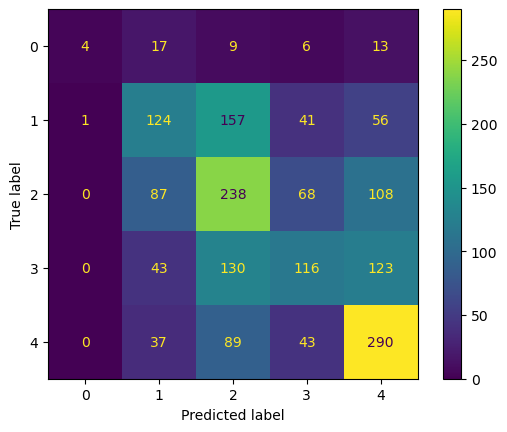

In [77]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [78]:
# Model evaluation on F1 score
best_model_f1= f1_score(y_val, y_pred, average="weighted")
print("model F1 score: %.3f" % best_model_f1)

model F1 score: 0.416


**Final Conclusion on ML approach.

At the end, after all the preprocessing and using all possible models and hyperparameters, the voting classifier with soft voting gave the highest Quadratic Kappa Score. It seems individual classifers struggle which may be due to model biases or limited data. Thanks to the voting classifier, we harness the collective intelligence of multiple classifiers to get a slightly better and accurate predictions.

Ultimately, we'll be using this voting classifier to make predictions on our test set.

## Prediction on Test Dataset

### preprocessing

we'll use all our already defined functions for quick preprocessing

In [79]:
test.head()

,Type,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed
0,Cat,1.0,Male,Black,White,Unknown,Small,Yes,No,No,No,Healthy,0.0,"kitten for adoption, pls call for enquiry, off...",/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair
1,Dog,8.0,Male,Black,Brown,Unknown,Medium,Yes,No,No,No,Healthy,0.0,"Stray puppy that came to my house. Obedient, w...",/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed
2,Dog,2.0,Female,Brown,Cream,White,Medium,Unknown,Yes,Yes,No,Healthy,0.0,A kind person rescued her in an abandoned buil...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed
3,Dog,3.0,Female,Black,Brown,Unknown,Medium,Yes,Yes,Yes,No,Healthy,0.0,"Sweety as her name says is a sweet , fun and c...",/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed
4,Cat,3.0,Female,Brown,Cream,White,Medium,Yes,No,No,No,Healthy,10.0,3 months old kitten for adoption. Female and p...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair


In [80]:
test.head()
test['COlorsNum'] = test.apply(num_colors, axis=1)
test = drop_columns(test)
test = UnknownCategory(test)
test['PetCategory'] = test.apply(classify_pet_age, axis=1)
test= encode_gender_health(test)
test = MaturityEncoding(test, 'MaturitySize')
test['Description'] = test['Description'].apply(clean_and_lemmatize)

Columns 'Color2' and 'Color3' have been dropped.


In [81]:
test.shape

(500, 16)

In [82]:
X_test_Image= extract_image_features(test, test_image_directory)

Found 500 validated image filenames.


C:\Users\KEMI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


In [83]:
X_test=preprocessor.transform(X_test_Image)

In [84]:
X_test.shape

(500, 323)

In [85]:
test_prediction=voting_clf.predict(X_test)

In [86]:
test_prediction

array([2., 4., 2., 2., 2., 1., 2., 1., 3., 1., 4., 2., 2., 4., 1., 4., 1.,
       1., 1., 4., 2., 2., 4., 2., 2., 2., 4., 2., 4., 3., 2., 3., 4., 4.,
       1., 3., 3., 1., 3., 4., 2., 1., 4., 4., 1., 3., 2., 4., 4., 4., 4.,
       2., 4., 1., 4., 4., 1., 2., 4., 4., 4., 3., 1., 2., 3., 4., 1., 3.,
       4., 4., 3., 2., 2., 1., 3., 2., 1., 2., 1., 3., 3., 2., 4., 4., 1.,
       1., 2., 4., 1., 4., 1., 2., 1., 3., 2., 2., 4., 4., 2., 4., 3., 4.,
       1., 4., 4., 4., 2., 4., 2., 2., 1., 4., 2., 4., 4., 3., 4., 3., 4.,
       4., 3., 4., 4., 1., 2., 2., 2., 2., 1., 3., 4., 1., 2., 1., 3., 4.,
       2., 2., 4., 1., 3., 2., 2., 1., 4., 2., 4., 4., 2., 1., 1., 4., 4.,
       2., 2., 3., 2., 2., 3., 4., 1., 1., 4., 3., 2., 4., 2., 4., 4., 4.,
       4., 4., 4., 3., 4., 2., 3., 4., 4., 4., 4., 2., 1., 2., 3., 3., 1.,
       1., 3., 4., 4., 4., 4., 4., 2., 1., 3., 3., 2., 4., 4., 1., 4., 2.,
       3., 4., 2., 4., 4., 1., 3., 2., 4., 2., 1., 4., 4., 4., 3., 3., 2.,
       4., 2., 1., 1., 2.

In [87]:
ids = range(1, len(test_prediction) + 1)

# Create a DataFrame with ID and prediction columns
predictions_df = pd.DataFrame({'ID': ids, 'prediction': test_prediction})

In [88]:
predictions_df.head()

,ID,prediction
0,1,2.0
1,2,4.0
2,3,2.0
3,4,2.0
4,5,2.0


In [89]:
# Save the DataFrame to a CSV file
predictions_df.to_csv('Final_predictionsML.csv', index=False)


# Deep Learning Approach 

Switching to a deep learning approach for a project that involves diverse data types (numerical, categorical, text, and image data) requires specific preprocessing steps for each type of data and the design of an appropriate neural network architecture that can handle these diverse inputs. Below is the outline of the general approach tailored to each data type and suggest the model fitting strategy we'll be using for this project.

**preprocessing steps**

1. Normalization of Numerical Data. we'll be using MinMaxScaler here as neural network architectures do better with binary units

2. One-hot Encoding and Embeddings of Categorical variables. For Deep lerning, especially with high cardinality features, using embedding layers will help us represent the categorical variables in a compact and dense representation.

3. Tokenization and vectorization of text(description column). This process is aimed to convert texts into sequences of tokens or words and then represent these tokens as numerical data. We will use different approach including the TfIdf vectorizer or pre trained embeddings like Glove or Word2Vec for this objectives. Finally, since neural networks requiers inputs of the same length, we wil use padding to set the sequences to a fixed length.

4. Resize, normalize and use a pre trained CNN model on the Image data. 


**Model Architecture**

The dataset is obviously heterogenous so we will seek to use a multi-input model as it will be beneficial. We will create models that can process multiple inputs separately and eventually merge them into a unified representation.


For our model archictecture, here's an overview of what it will be like:

1. separate subnetworks for each data type. For numerial and categorical data, we'll use dense layers. CNNs are standard for image data and we'll use LSTM for text data.

2. Concatenate the outputs of all these subnetworks

3. Perharps we can add addtional dense layers after merging these subnetworks to learn the combined representation effectively.

4. Fit and train our models using techniques such as dropout and earlystopping to mitigate overfitting.

5. Tune our hyperparameters with the hope of finding the best sets that will return a substantial quadratic qappa score.

## Preprocessing

we'll be using all our pre-defined functions

In [90]:
train_df['COlorsNum'] = train_df.apply(num_colors, axis=1)
train_df = drop_columns(train_df)
train_df = UnknownCategory(train_df)
train_df['PetCategory'] = train_df.apply(classify_pet_age, axis=1)
train_df= encode_gender_health(train_df)
train_df = MaturityEncoding(train_df, 'MaturitySize')
train_df['Description'] = train_df['Description'].apply(clean_and_lemmatize)
train_df['Images'] = train_df['Images'].apply(lambda img: find_image(img, train_image_directory))

Columns 'Color2' and 'Color3' have been dropped.


In [91]:
train_df.head()

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,AdoptionSpeed,Images,Breed,COlorsNum,PetCategory
0,Dog,84.0,1,Brown,0,No,Unknown_Vaccinated,Yes,No,1,0.0,either lost abandoned please contact u know owner,4.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Terrier,2,adult
1,Dog,1.0,0,Black,1,Yes,No,Yes,No,1,50.0,hi name rose friendly always happy see rescuer...,3.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
2,Dog,1.0,1,Brown,1,Yes,No,No,No,1,0.0,puppy age unknown husband went mountain biking...,1.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
3,Dog,3.0,1,Black,1,Yes,Unknown_Vaccinated,Yes,Unknown_Sterilized,1,0.0,hi randy week ago got beaten human caused brok...,4.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
4,Dog,8.0,1,Brown,2,Yes,Yes,Yes,No,1,0.0,abandoned puppy looking home hi johnny le year...,3.0,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy


In [92]:
numerical= ["Age", "Fee", "COlorsNum", "Gender", "MaturitySize", "Health"]
categorical_columns = ['Type', 'Color1', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Breed', 'PetCategory']

In [93]:
X = train_df.drop('AdoptionSpeed', axis=1)
y = train_df['AdoptionSpeed']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
from sklearn.compose import ColumnTransformer


# scaling the numnerical variables
numerical_preprocessor = MinMaxScaler()

#perform label encoding on the categorical data
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize and fit the tokenizer
tokenizer = Tokenizer(num_words=10000)  
tokenizer.fit_on_texts(X_train["Description"])

# Convert texts to sequences of integers
train_sequences = tokenizer.texts_to_sequences(X_train["Description"])
val_sequences = tokenizer.texts_to_sequences(X_val["Description"]) 

# Pad sequences to ensure uniform length
max_length = 100
train_padded = pad_sequences(train_sequences, maxlen=max_length)
val_padded = pad_sequences(val_sequences, maxlen=max_length)

In [96]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

#base model for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False)
base_model = Model(inputs=base_model.inputs, outputs=base_model.output)


def extract_features_batch(img_paths, model=base_model, batch_size=64):
    batch_features = []
    for i in range(0, len(img_paths), batch_size):
        batch_paths = img_paths[i:i+batch_size]
        batch_imgs = np.vstack([preprocess_input(np.expand_dims(image.img_to_array(image.load_img(img_path, target_size=(224, 224))), axis=0)) for img_path in batch_paths])
        batch_features.append(model.predict(batch_imgs, batch_size=batch_size))
    return np.vstack(batch_features).reshape(len(img_paths), -1)  # Reshape to ensure correct dimensions


In [97]:
Image_features_train = extract_features_batch(X_train["Images"]) #Images contain the path to each Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [98]:

Image_features_val= extract_features_batch(X_val["Images"].values) #Images contain the path to each Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [99]:

# Define the complete preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ("numerical_encoding", numerical_preprocessor, numerical),
    ("categorical_encoding", categorical_preprocessor, categorical_columns),
],)

# Now apply preprocessing to the training data
X_train_numcat= preprocessor.fit_transform(X_train)

# Apply the same transformation to the validation data
X_val_numcat= preprocessor.transform(X_val)

In [100]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam

# we define dimensions based on the preprocessing
num_cat_features = X_train_numcat.shape[1]
num_text_tokens = 10000  # From Tokenizer
embedding_dim = 256  # Arbitrary choice
max_length = 100  # From text padding
image_feature_dim = Image_features_train.shape[1] 

# Define input layers
numCat_input = Input(shape=(num_cat_features,), name='numerical_input')
text_input = Input(shape=(max_length,), name='text_input')
image_input = Input(shape=(image_feature_dim,), name='image_input')

# Text branch
text_embedding = Embedding(input_dim=num_text_tokens, output_dim=embedding_dim)(text_input)
text_lstm = LSTM(64)(text_embedding)

# Image branch
image_dense = Dense(256, activation='relu')(image_input)

# Concatenate all branches
concatenated = Concatenate()([numCat_input, text_lstm, image_dense])

# Fully connected layers
x = Dense(128, activation='relu')(concatenated)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax', name='output')(x)  # 5 classes for AdoptionSpeed

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf


model = Model(inputs=[numCat_input, text_input, image_input], outputs=output)


# Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [102]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ text_input (InputLayer)       │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 100, 256)          │       2,560,000 │ text_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ image_input (InputLayer)      │ (None, 100352)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numerical_input (InputLayer)  │ (None, 175)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 64)                │          82,176 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 256)               │      25,690,368 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 495)               │               0 │ numerical_input[0][0],     │
│                               │                           │                 │ lstm[0][0], dense[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 128)               │          63,488 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128)               │               0 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output (Dense)                │ (None, 5)                 │             645 │ dropout[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 28,396,677 (108.32 MB)

 Trainable params: 28,396,677 (108.32 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
np.save("Image_features_trainResNet.npy", Image_features_train)
np.save("Image_features_valResNet.npy", Image_features_val)

In [104]:
# Model training with early stopping
history = model.fit(
    [X_train_numcat, train_padded, Image_features_train], y_train,
    validation_data=([X_val_numcat, val_padded, Image_features_val], y_val),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 234ms/step - accuracy: 0.2553 - loss: 7.6645 - val_accuracy: 0.2583 - val_loss: 1.5055
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 237ms/step - accuracy: 0.2889 - loss: 1.5476 - val_accuracy: 0.2650 - val_loss: 1.4906
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 227ms/step - accuracy: 0.2817 - loss: 1.5296 - val_accuracy: 0.2889 - val_loss: 1.4965
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.2917 - loss: 1.4921 - val_accuracy: 0.2783 - val_loss: 1.4808
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.2916 - loss: 1.5217 - val_accuracy: 0.3006 - val_loss: 1.4799
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.2953 - loss: 1.4708 - val_accuracy: 0.2844 - val_loss: 1.4713
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 231ms/step - accuracy: 0.2972 - loss: 1.4584 - val_accuracy: 0.2972 - val_loss: 1.4692
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.3186 -

### Post training Evaluation

In [105]:

predictions_proba = model.predict([X_val_numcat, val_padded, Image_features_val])
predictions = np.argmax(predictions_proba, axis=1)  # Get the class with the highest probability

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [106]:
from sklearn.metrics import cohen_kappa_score
kappa_score = cohen_kappa_score(y_val, predictions, weights='quadratic')
print(f"Quadratic Kappa Score on Validation Set: {kappa_score}")

Quadratic Kappa Score on Validation Set: 0.1839052190671865


A kappa score of 0.18 indicates slight agreement, which is indeed on the lower side, suggesting that the model's predictions are not well-aligned with the actual labels. we tried different strategies including using embeddings for categorical features, GLOVE for text data and changing the CNN approach with the image dataset to VGG16. However, this is the best score we got, which itself is relatively low.


Now we'll put all the hopes on Keras Tuner to help us find the best set of parameters that will be suitable for this model

### Hyperparameters tuning

In [107]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.regularizers import l2

def build_model(hp):
    # Inputs
    numCat_input = Input(shape=(num_cat_features,), name='numerical_input')
    text_input = Input(shape=(max_length,), name='text_input')
    image_input = Input(shape=(image_feature_dim,), name='image_input')

    # Text branch
    hp_embedding_dim = hp.Choice('embedding_dim', values=[64, 128, 256])
    text_embedding = Embedding(input_dim=num_text_tokens, output_dim=hp_embedding_dim)(text_input)
    hp_lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    text_lstm = LSTM(hp_lstm_units)(text_embedding)
    text_dropout = Dropout(hp.Float('text_dropout_rate', min_value=0.0, max_value=0.5, step=0.1))(text_lstm)

    # Image branch
    hp_dense_units = hp.Int('image_dense_units', min_value=128, max_value=512, step=32)
    image_dense = Dense(hp_dense_units, activation='relu', kernel_regularizer=l2(hp.Float('l2_regularization', min_value=1e-5, max_value=1e-2, sampling='LOG')))(image_input)
    image_dropout = Dropout(hp.Float('image_dropout_rate', min_value=0.0, max_value=0.5, step=0.1))(image_dense)

    # Concatenate all branches
    concatenated = Concatenate()([numCat_input, text_dropout, image_dropout])

    # Fully connected layers
    hp_dense_units_final = hp.Int('final_dense_units', min_value=32, max_value=256, step=32)
    x = Dense(hp_dense_units_final, activation='relu')(concatenated)
    final_dropout = Dropout(hp.Float('final_dropout_rate', min_value=0.0, max_value=0.5, step=0.1))(x)
    output = Dense(5, activation='softmax', name='output')(final_dropout)

    # Construct the model
    model = Model(inputs=[numCat_input, text_input, image_input], outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [108]:
import keras_tuner as kt
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='intro_to_kt_new'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(
    {'numerical_input': X_train_numcat, 'text_input': train_padded, 'image_input': Image_features_train},
    y_train,
    validation_data=(
        {'numerical_input': X_val_numcat, 'text_input': val_padded, 'image_input': Image_features_val},
        y_val
    ),
    epochs=100,
    batch_size=64,
    callbacks=[stop_early]
)

Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [109]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("The hyperparameter search is complete.")
print(f"The optimal embedding dimension is {best_hps.get('embedding_dim')}.")
print(f"The optimal LSTM units are {best_hps.get('lstm_units')}.")
print(f"The optimal text dropout rate is {best_hps.get('text_dropout_rate')}.")
print(f"The optimal image dense units are {best_hps.get('image_dense_units')}.")
print(f"The optimal image dropout rate is {best_hps.get('image_dropout_rate')}.")
print(f"The optimal final dense units are {best_hps.get('final_dense_units')}.")
print(f"The optimal final dropout rate is {best_hps.get('final_dropout_rate')}.")
print(f"The optimal L2 regularization strength is {best_hps.get('l2_regularization')}.")


The hyperparameter search is complete.
The optimal embedding dimension is 256.
The optimal LSTM units are 128.
The optimal text dropout rate is 0.2.
The optimal image dense units are 128.
The optimal image dropout rate is 0.1.
The optimal final dense units are 224.
The optimal final dropout rate is 0.2.
The optimal L2 regularization strength is 1.2913006496391556e-05.


Now that we get the best sets of hyperparameters from the keras Tuner, we can use this in our model architecture

In [125]:
def build_final_model():
    # Inputs
    numCat_input = Input(shape=(num_cat_features,), name='numerical_input')
    text_input = Input(shape=(max_length,), name='text_input')
    image_input = Input(shape=(image_feature_dim,), name='image_input')

    # Text branch with optimal hyperparameters
    text_embedding = Embedding(input_dim=num_text_tokens, output_dim=256)(text_input)  # Optimal embedding dimension
    text_lstm = LSTM(128)(text_embedding)  # Optimal LSTM units
    text_dropout = Dropout(0.2)(text_lstm)  # Optimal text dropout rate

    # Image branch with optimal hyperparameters
    image_dense = Dense(128, activation='relu', kernel_regularizer=l2(1.2913006496391556e-05))(image_input)  # Optimal image dense units and L2 regularization
    image_dropout = Dropout(0.1)(image_dense)  # Optimal image dropout rate

    # Concatenate all branches
    concatenated = Concatenate()([numCat_input, text_dropout, image_dropout])

    # Fully connected layers with optimal hyperparameters
    x = Dense(224, activation='relu')(concatenated)  # Optimal final dense units
    final_dropout = Dropout(0.2)(x)  # Optimal final dropout rate
    output = Dense(5, activation='softmax', name='output')(final_dropout)

    # Construct the model
    model = Model(inputs=[numCat_input, text_input, image_input], outputs=output)
    
    # Compile the model with optimal L2 regularization strength
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Build the final model
final_model = build_final_model()

# Train the final model 
final_model.fit(
    [X_train_numcat, train_padded, Image_features_train], y_train,
    validation_data=([X_val_numcat, val_padded, Image_features_val], y_val),
    epochs=100,
    batch_size=64, 
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)


Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - accuracy: 0.2899 - loss: 3.6646 - val_accuracy: 0.3600 - val_loss: 1.4128
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 233ms/step - accuracy: 0.4007 - loss: 1.3607 - val_accuracy: 0.3894 - val_loss: 1.3666
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 230ms/step - accuracy: 0.5680 - loss: 1.1257 - val_accuracy: 0.3817 - val_loss: 1.4686
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.6868 - loss: 0.8246 - val_accuracy: 0.3706 - val_loss: 1.6755
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 237ms/step - accuracy: 0.7870 - loss: 0.6015 - val_accuracy: 0.3706 - val_loss: 1.8706
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 235ms/step - accuracy: 0.8432 - loss: 0.4502 - val_accuracy: 0.3628 - val_loss: 2.1102
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 29s 253ms/step - accuracy: 0.8657 - loss: 0.3863 - val_accuracy: 0.3600 - val_loss: 2.4200


In [126]:
from sklearn.metrics import cohen_kappa_score

# Make predictions on the validation data
predictions_proba = final_model.predict([X_val_numcat, val_padded, Image_features_val])
predictions = np.argmax(predictions_proba, axis=1)

# Calculate the quadratic kappa score
kappa_score = cohen_kappa_score(y_val, predictions, weights='quadratic')

print(f"Quadratic Kappa Score on Validation Data: {kappa_score}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Quadratic Kappa Score on Validation Data: 0.32063225009875984


A quadratic kappa score of 0.3206 on the validation data indicates a fair level of agreement between the predicted and actual class labels, which is an improvement from the initial score we got. 

### Ensemble Method


As we've seen during the ML approach, Combining the predictions of several models can often lead to better performance than any single model.

In [127]:
# Predict probabilities for each class from each model
predictions1 = model.predict([X_val_numcat, val_padded, Image_features_val])
predictions2 = final_model.predict([X_val_numcat, val_padded, Image_features_val])

# Average predictions
average_predictions = (predictions1 + predictions2) / 2

# Convert averaged probabilities to class labels
ensemble_predictions = np.argmax(average_predictions, axis=1)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


In [128]:
# Weighted average predictions
weights = [0.7, 0.3] 
weighted_predictions = (predictions1 * weights[0] + predictions2 * weights[1])

# Convert weighted probabilities to class labels
ensemble_predictions_weighted = np.argmax(weighted_predictions, axis=1)

In [129]:
# Calculate the quadratic kappa score
kappa_score = cohen_kappa_score(y_val, ensemble_predictions_weighted, weights='quadratic')

print(f"Quadratic Kappa Score on Validation Data: {kappa_score}")


Quadratic Kappa Score on Validation Data: 0.29470778530007036


### Prediction on Test Dataset

In [115]:
test_df['COlorsNum'] = test_df.apply(num_colors, axis=1)
test_df= drop_columns(test_df)
test_df= UnknownCategory(test_df)
test_df['PetCategory'] = test_df.apply(classify_pet_age, axis=1)
test_df= encode_gender_health(test_df)
test_df= MaturityEncoding(test_df, 'MaturitySize')
test_df['Description'] = test_df['Description'].apply(clean_and_lemmatize)

Columns 'Color2' and 'Color3' have been dropped.


In [116]:
test_df['Images'] = test_df['Images'].apply(lambda img: find_image(img, test_image_directory))

In [130]:
test_df

,Type,Age,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Fee,Description,Images,Breed,COlorsNum,PetCategory
0,Cat,1.0,1,Black,0,Yes,No,No,No,1,0.0,kitten adoption pls call enquiry office hour t...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair,2,kitten
1,Dog,8.0,1,Black,1,Yes,No,No,No,1,0.0,stray puppy came house obedient bark whine whe...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,2,puppy
2,Dog,2.0,0,Brown,1,Unknown_FurLength,Yes,Yes,No,1,0.0,kind person rescued abandoned building interes...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,3,puppy
3,Dog,3.0,0,Black,1,Yes,Yes,Yes,No,1,0.0,sweety name say sweet fun cute little gal dump...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,2,puppy
4,Cat,3.0,0,Brown,1,Yes,No,No,No,1,10.0,month old kitten adoption female potty trained...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair,3,kitten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Cat,4.0,1,Yellow,1,Yes,No,No,No,1,0.0,friendly kitty like follow around sometimes,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair,1,kitten
496,Dog,1.0,0,Brown,1,Yes,No,No,No,1,0.0,female puppy adoption week please call jesse m...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Mixed_Breed,1,puppy
497,Cat,10.0,0,Black,1,Yes,Yes,Yes,Yes,1,100.0,mimi hard start life raped young age progresse...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair,2,young
498,Cat,12.0,0,Black,1,Yes,Yes,Yes,Yes,1,120.0,found last year mouth bleeding teeth damage mi...,/Users/KEMI/Desktop/Habeeb/ML Folder/PetExtrac...,Domestic_Short_Hair,2,young


In [131]:
# Apply the same transformation to the validation data
test_numcat= preprocessor.transform(test_df)
test_sequences = tokenizer.texts_to_sequences(test_df["Description"]) 

test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [132]:
Image_features_test= extract_features_batch(test_df["Images"].values) #Images contain the path to each Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [135]:

# Make predictions on the test data
predictions_proba = final_model.predict([test_numcat, test_padded, Image_features_test])
predictions = np.argmax(predictions_proba, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [136]:
predictions

array([2, 2, 2, 3, 1, 1, 2, 3, 2, 2, 4, 2, 1, 3, 1, 4, 2, 2, 3, 4, 2, 2,
       3, 1, 2, 2, 2, 1, 4, 3, 2, 4, 4, 2, 1, 2, 2, 1, 2, 3, 2, 1, 4, 3,
       2, 4, 1, 4, 4, 3, 4, 3, 4, 1, 2, 4, 1, 4, 4, 4, 1, 2, 1, 3, 3, 4,
       1, 3, 4, 4, 3, 2, 2, 1, 3, 1, 4, 2, 2, 3, 2, 2, 4, 3, 1, 1, 1, 2,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 4, 2, 3, 2, 4, 3, 2, 2, 2,
       1, 4, 2, 4, 4, 1, 2, 3, 2, 4, 3, 2, 4, 1, 4, 2, 2, 3, 2, 2, 4, 3,
       2, 2, 2, 4, 2, 3, 2, 2, 2, 1, 2, 2, 4, 1, 4, 3, 2, 4, 2, 4, 2, 2,
       2, 3, 4, 2, 3, 4, 2, 2, 4, 3, 2, 4, 2, 4, 4, 4, 4, 4, 4, 3, 4, 1,
       3, 1, 4, 4, 3, 3, 2, 2, 4, 3, 2, 1, 3, 2, 2, 4, 4, 4, 2, 2, 3, 3,
       2, 4, 4, 2, 4, 2, 3, 2, 2, 4, 2, 3, 2, 2, 4, 2, 1, 4, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 1, 4, 2, 2, 4, 2, 4, 2, 3, 2, 2,
       4, 3, 1, 4, 2, 2, 4, 1, 3, 4, 2, 4, 3, 4, 3, 1, 2, 1, 2, 2, 1, 1,
       4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 3, 2, 2, 2, 4, 3, 1,
       4, 1, 3, 3, 3, 2, 4, 2, 4, 4, 2, 4, 4, 4, 3,

In [122]:
ids = range(1, len(predictions) + 1)

# Create a DataFrame with ID and prediction columns
predictions_test = pd.DataFrame({'ID': ids, 'prediction': predictions})

In [123]:
predictions_test.head()

,ID,prediction
0,1,2
1,2,2
2,3,2
3,4,3
4,5,1


In [124]:
predictions_test.to_csv("FinalPredictionsDL.csv", index=False)

## Summary


Throughout the project, we've applied a range of machine learning and deep learning techniques, from individual model training and hyperparameter optimization to sophisticated ensemble methods.

we've experimented with several models, including logistic regression, random forests, gradient boosting machines (XGBoost, LightGBM), and potentially more. Each of these models has its strengths and is capable of capturing different patterns in the data.

Thankfully, Using hyperparemeter tuning tools like Keras Tuner and RandomizedSearchCV helped us conduct hyperparameter tuning to optimize the models' performance. This step is crucial to finding the best model configuration and improving model accuracy.

The use of a voting classifier and the exploration of different models and their configurations highlight a thorough approach to tackling the prediction task. At the end, we can settle for the qappa score of 0.4+  and 0.3+ we have got for the machine learning and deep learning approach respectively. These are the best possible scores we can get given the dataset, feature engineering, model selection and tuning we've done. 
